In [5]:
from sim_pipeline.Halos.halos import number_density_at_redshift,redshift_mass_number
from astropy.cosmology import default_cosmology
import astropy.units as u
import numpy as np
from sim_pipeline.Skypy_halos_duplicate.power_spectrum import eisenstein_hu
from sim_pipeline.Skypy_halos_duplicate.halos.mass import ellipsoidal_collapse_function

sky_area = 0.0001 * u.deg **2
z_max = 5.0
m_min = 1.0E+12
m_max = 1.0E+16
resolution= 100
z_range = np.linspace(start=0, stop=z_max, num=resolution)
cosmology = default_cosmology.get()
wavenumber = np.logspace(-3, 1, 1000)
params = (0.3, 0.7, 0.3, 1.686)
collapse_function = ellipsoidal_collapse_function
power_spectrum=eisenstein_hu(wavenumber=wavenumber, A_s=2.1982e-09, n_s=0.969453, cosmology=cosmology)

N_halos,density1 = redshift_mass_number(z_range, sky_area, cosmology, m_min, m_max, resolution, wavenumber, collapse_function, power_spectrum,params)
print(N_halos)

redshift list [0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.4

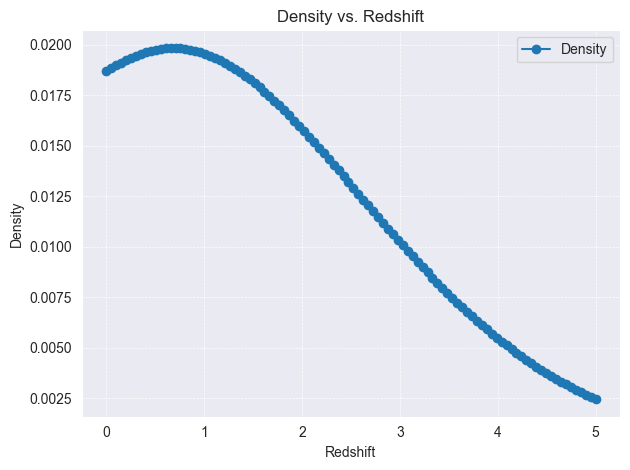

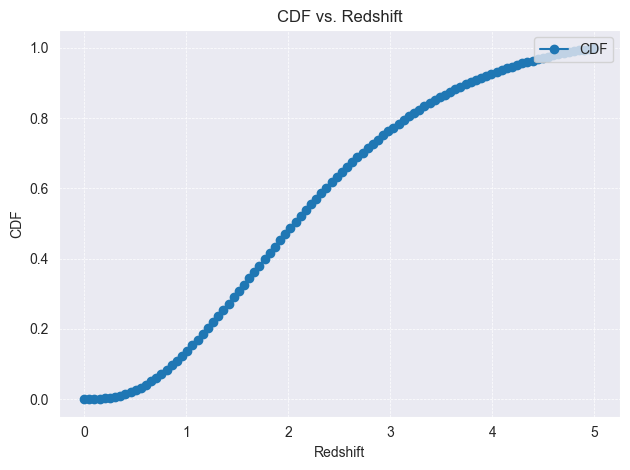

In [19]:
import matplotlib.pyplot as plt

plt.plot(z_range, density1, '-o', label='Density')  # '-o' means line with markers

plt.xlabel('Redshift')
plt.ylabel('Density')
plt.title('Density vs. Redshift')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


ceshidN_dz = (cosmology.differential_comoving_volume(z_range) * sky_area).to_value(
        "Mpc3"
    )
ceshidN_dz *= density1
cdf = ceshidN_dz  # reuse memory
np.cumsum((ceshidN_dz[1:] + ceshidN_dz[:-1]) / 2 * np.diff(z_range), out=cdf[1:])
cdf[0] = 0
cdf /= cdf[-1]

plt.plot(z_range, cdf, '-o', label='CDF')  # '-o' means line with markers
plt.xlabel('Redshift')
plt.ylabel('CDF')
plt.title('CDF vs. Redshift')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

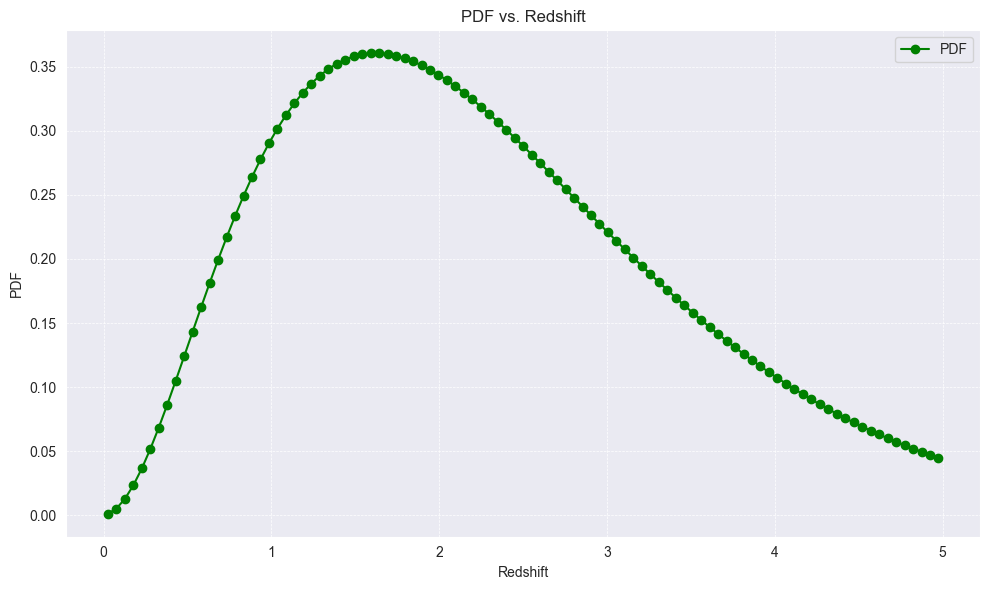

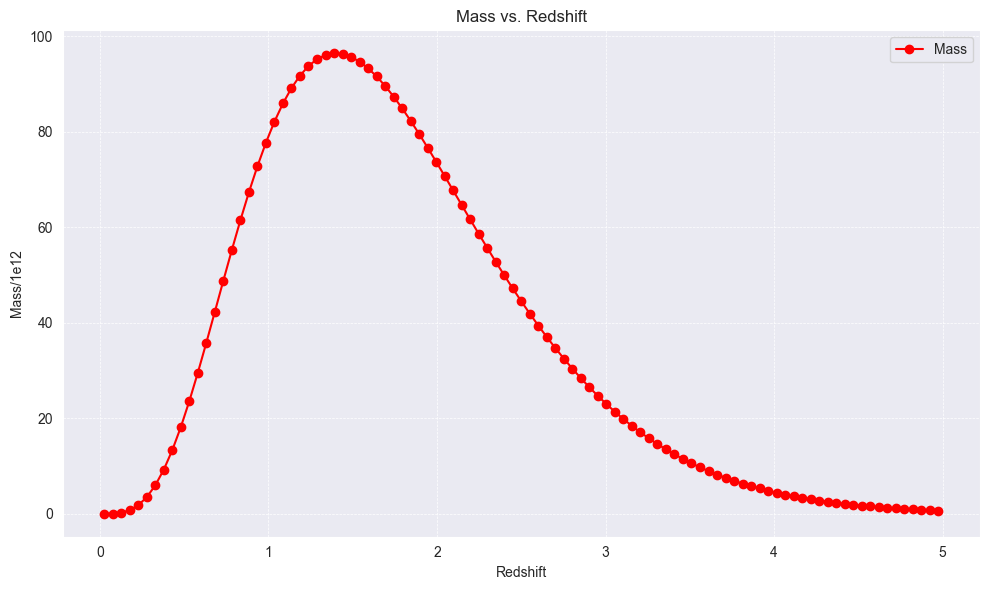

In [20]:
from sim_pipeline.Halos.halos import mass_first_moment_at_redshift
pdf = np.diff(cdf) / np.diff(z_range)

# The z values for the PDF would be the mid-points of z_range values
z_mid_points = (z_range[:-1] + z_range[1:]) / 2

# Plotting PDF vs. Redshift
plt.figure(figsize=(10, 6))
plt.plot(z_mid_points, pdf, '-o', color='green', label='PDF')
plt.xlabel('Redshift')
plt.ylabel('PDF')
plt.title('PDF vs. Redshift')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

mass_fortest=mass_first_moment_at_redshift(z_mid_points,
        sky_area,
        m_min=m_min,
        m_max=m_max,
        resolution=resolution,
        wavenumber=wavenumber,
        power_spectrum=power_spectrum,
        cosmology=cosmology,
        collapse_function=collapse_function,
        params=params)
mass_fortest *= pdf
plt.figure(figsize=(10, 6))
plt.plot(z_mid_points, N_halos*mass_fortest/1e12, '-o', color='red', label='Mass')
plt.xlabel('Redshift')
plt.ylabel('Mass/1e12')
plt.title('Mass vs. Redshift')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [21]:
linspace_values = np.arange(0.025, z_max, 0.05)
density_tot = []
n_halos = []
for zi in linspace_values:
        redshift_list = np.linspace(zi - 0.025, zi + 0.025, 20)
        dV_dz = (cosmology.differential_comoving_volume(redshift_list) * sky_area).to_value("Mpc3")
        density = number_density_at_redshift(
            z=redshift_list,
            m_min=m_min,
            m_max=m_max,
            resolution=resolution,
            wavenumber=wavenumber,
            power_spectrum=power_spectrum,
            cosmology=cosmology,
            collapse_function=collapse_function,
            params=params,
        )
        density_tot.append(density)
        dN_dz = density * dV_dz
        N = np.trapz(dN_dz, redshift_list)
        n_halos.append(N)
print(f'Number of halos at z={linspace_values} is {n_halos}')


Number of halos at z=[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975] is [0.002007232503536034, 0.013543819949654227, 0.035259939129531, 0.0656761647925054, 0.10334526271300344, 0.1468806682432871, 0.1949788636827676, 0.2464356031755025, 0.3001563623726505, 0.3551616760332125, 0.4105881826728397, 0.4656862452725031, 0.5198149890311854, 0.5724355182622759, 0.6231029678093243, 0.6714579275007623, 0.7172176635482602, 0.7601674561422237, 0

In [22]:
print(np.sum(n_halos))

58.1142248977186


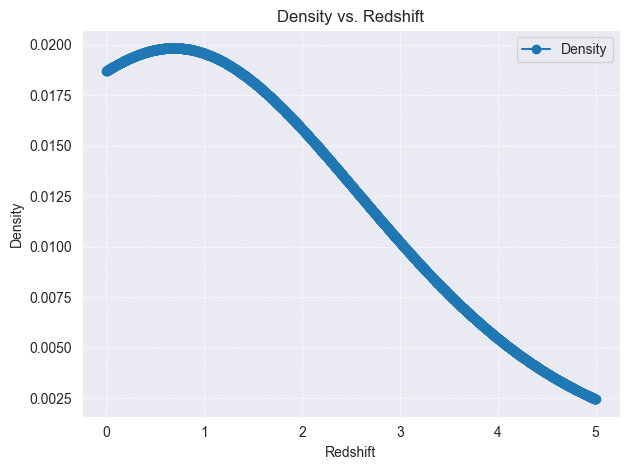

In [23]:
flattened_density = [item for sublist in density_tot for item in sublist]
z_range2 = np.linspace(start=0, stop=z_max, num=len(flattened_density))

plt.plot(z_range2, flattened_density, '-o', label='Density')  # '-o' means line with markers

plt.xlabel('Redshift')
plt.ylabel('Density')
plt.title('Density vs. Redshift')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [24]:
from sim_pipeline.Skypy_halos_duplicate.halos.mass import halo_mass_function
from hmf.cosmology.growth_factor import GrowthFactor
from scipy import integrate

m = np.logspace(np.log10(m_min), np.log10(m_max), resolution)
gf = GrowthFactor(cosmo=cosmology)
m2_list = []
for i, zi in enumerate(linspace_values):
    growth_function = gf.growth_factor(zi)
    massf = halo_mass_function(
        m,
        wavenumber,
        power_spectrum,
        growth_function,
        cosmology,
        collapse_function,
        params=params,
    )
    # Halo mass function for a given mass array, cosmology and redshift, in
    # units of Mpc-3 Msun-1
    norm_factor = integrate.trapz(massf, m)
    massf_normalized = massf / norm_factor

# Compute the expectation value (average mass) using the normalized mass function
    expectation_m_normalized = integrate.trapz(m * massf_normalized, m)
    m2 = expectation_m_normalized * n_halos[i]
    m2_list.append(m2)
print(f'Number of halos at z={linspace_values} is {m2_list}')

Number of halos at z=[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975] is [17785946622.11756, 116948368263.46162, 296623221508.49835, 538187033060.15704, 824860431065.3375, 1141852069151.5374, 1476400344731.0928, 1817732118740.8357, 2156958718285.79, 2486928533679.7085, 2802053242700.2695, 3098121749950.0933, 3372112812301.2554, 3622014368637.8345, 3846655000741.1895, 4045550811165.588, 4218769326789.2393, 4366810789710.585, 44905063218

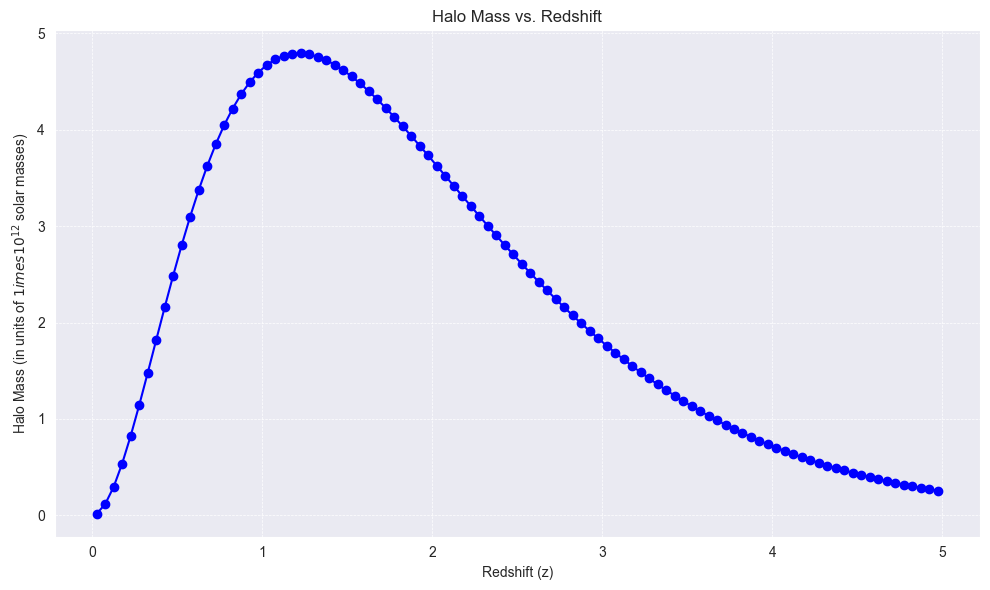

In [25]:
import matplotlib.pyplot as plt

# Convert m2_list values from units of solar masses to units of 1e12 solar masses
m2_list_in_1e12 = [value / 1e12 for value in m2_list]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(linspace_values, m2_list_in_1e12, '-o', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Halo Mass (in units of $1 \times 10^{12}$ solar masses)')
plt.title('Halo Mass vs. Redshift')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [26]:
print(linspace_values, m2_list)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975] [17785946622.11756, 116948368263.46162, 296623221508.49835, 538187033060.15704, 824860431065.3375, 1141852069151.5374, 1476400344731.0928, 1817732118740.8357, 2156958718285.79, 2486928533679.7085, 2802053242700.2695, 3098121749950.0933, 3372112812301.2554, 3622014368637.8345, 3846655000741.1895, 4045550811165.588, 4218769326789.2393, 4366810789710.585, 4490506321880.091, 4590931878625.12

In [1]:
from sim_pipeline.Halos.halos_plus_glass import run_compute_kappa_in_bins_by_multiprocessing
from astropy.cosmology import default_cosmology
cosmology = default_cosmology.get()

kappa_dict = run_compute_kappa_in_bins_by_multiprocessing(        n_iterations=5000,
        sky_area=0.0001,
        samples_number=2,
        cosmo=cosmology,
        m_min='1.0E+12',
        m_max='1.0E+16',
        z_max=5.0,
        mass_sheet_correction=False,
        zs=5.0,
        zd=0)
print(kappa_dict)

print(len(kappa_dict))


C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


The 5000 halo-lists took 3096.004851579666 seconds to run


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
for z, kappa in kappa_dict[0].items():
    print(f"z={z:.3f}, kappa={kappa:.6f}")


z=0.025, kappa=0.000000
z=0.075, kappa=0.000000
z=0.125, kappa=0.000000
z=0.175, kappa=0.000000
z=0.225, kappa=0.000000
z=0.275, kappa=0.000000
z=0.325, kappa=0.000000
z=0.375, kappa=0.000000
z=0.425, kappa=0.089001
z=0.475, kappa=0.000000
z=0.525, kappa=0.037690
z=0.575, kappa=0.000000
z=0.625, kappa=0.051208
z=0.675, kappa=0.000000
z=0.725, kappa=0.000000
z=0.775, kappa=0.000000
z=0.825, kappa=0.045371
z=0.875, kappa=0.040085
z=0.925, kappa=0.095259
z=0.975, kappa=0.000000
z=1.025, kappa=0.003810
z=1.075, kappa=0.000000
z=1.125, kappa=0.000000
z=1.175, kappa=0.000000
z=1.225, kappa=0.000000
z=1.275, kappa=0.007397
z=1.325, kappa=0.059709
z=1.375, kappa=0.012401
z=1.425, kappa=0.000000
z=1.475, kappa=0.000000
z=1.525, kappa=0.030606
z=1.575, kappa=0.008304
z=1.625, kappa=0.000000
z=1.675, kappa=0.076227
z=1.725, kappa=0.000000
z=1.775, kappa=0.000000
z=1.825, kappa=0.000000
z=1.875, kappa=0.000000
z=1.925, kappa=0.050467
z=1.975, kappa=0.000000
z=2.025, kappa=0.000000
z=2.075, kappa=0

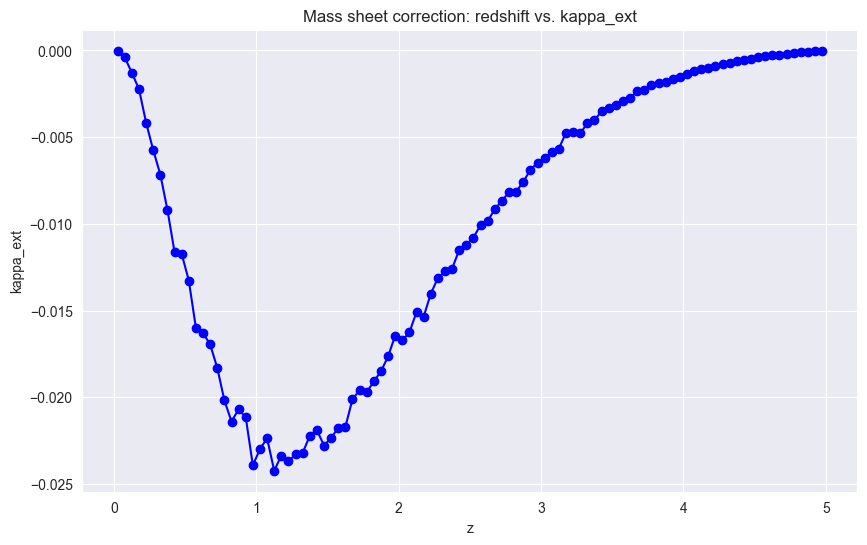

In [4]:
import matplotlib.pyplot as plt

avg_kappa_dict = {}
for single_dict in kappa_dict:
    for z, kappa in single_dict.items():
        if z in avg_kappa_dict:
            avg_kappa_dict[z].append(kappa)
        else:
            avg_kappa_dict[z] = [kappa]

for z, kappas in avg_kappa_dict.items():
    avg_kappa_dict[z] = sum(kappas) / len(kappas)

# Extract z values and their corresponding mean kappa values
z_values = list(avg_kappa_dict.keys())
mean_kappa_values = [-avg_kappa_dict[z] for z in z_values]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(z_values, mean_kappa_values, c='blue')
plt.plot(z_values, mean_kappa_values, 'o-', color='blue', markersize=5)
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)
plt.show()


In [5]:
print(z_values, mean_kappa_values)

[0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975, 1.025, 1.075, 1.125, 1.175, 1.225, 1.275, 1.325, 1.375, 1.425, 1.475, 1.525, 1.575, 1.625, 1.675, 1.725, 1.775, 1.825, 1.875, 1.925, 1.975, 2.025, 2.075, 2.125, 2.175, 2.225, 2.275, 2.325, 2.375, 2.425, 2.475, 2.525, 2.575, 2.625, 2.675, 2.725, 2.775, 2.825, 2.875, 2.925, 2.975, 3.025, 3.075, 3.125, 3.175, 3.225, 3.275, 3.325, 3.375, 3.425, 3.475, 3.525, 3.575, 3.625, 3.675, 3.725, 3.775, 3.825, 3.875, 3.925, 3.975, 4.025, 4.075, 4.125, 4.175, 4.225, 4.275, 4.325, 4.375, 4.425, 4.475, 4.525, 4.575, 4.625, 4.675, 4.725, 4.775, 4.825, 4.875, 4.925, 4.975] [-3.780301731363669e-05, -0.0004019777025183008, -0.0012887694342962393, -0.002233201309960291, -0.004162464072793366, -0.005747660055815765, -0.0071526588468533775, -0.00920195107613323, -0.011634319519898621, -0.011732453354479394, -0.013268864577372929, -0.0160089110194497, -0.016296206353592094

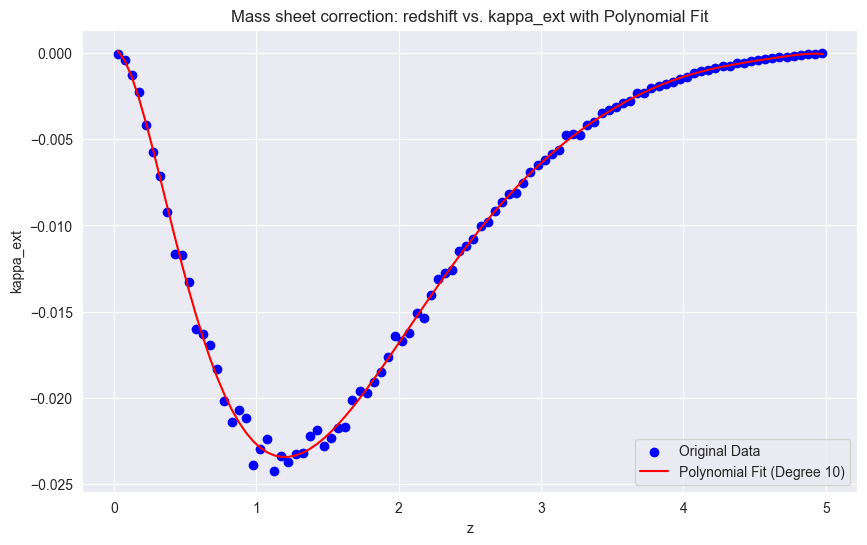

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

z = np.array(z_values).reshape(-1, 1)
mean_kappa = np.array(mean_kappa_values)

# Polynomial regression
degree = 10  # You can adjust the degree based on the fit you want
poly_features = PolynomialFeatures(degree=degree)
z_poly = poly_features.fit_transform(z)

model = LinearRegression()
model.fit(z_poly, mean_kappa)

# Predict
mean_kappa_pred = model.predict(z_poly)

# Plot the original data and the fit
plt.figure(figsize=(10, 6))
plt.scatter(z, mean_kappa, color='blue', label='Original Data')
plt.plot(z, mean_kappa_pred, color='red', label=f'Polynomial Fit (Degree {degree})')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.legend()
plt.title('Mass sheet correction: redshift vs. kappa_ext with Polynomial Fit')
plt.show()


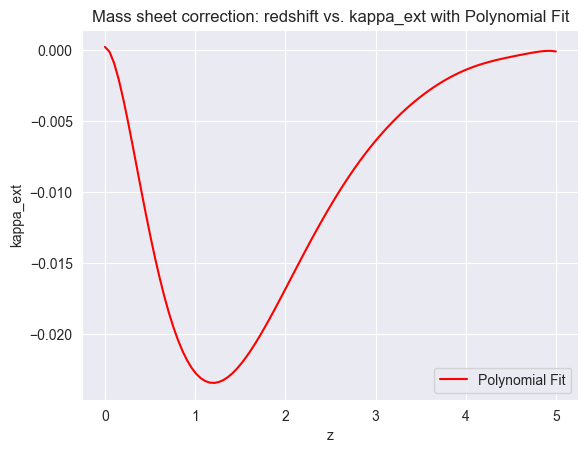

In [5]:
import numpy as np
import matplotlib.pyplot as plt
z=np.linspace(0,5,100)
m_ls=[]
for zi in z:
        m2 = (0.0002390784813232419 +
              -0.0014658189854554395 * zi +
              -0.11408175546088226 * (zi**2) +
              0.1858161514337054 * (zi**3) +
              -0.14580188720668946 * (zi**4) +
              0.07179490182290658 * (zi**5) +
              -0.023842218143709567 * (zi**6) +
              0.00534416068166958 * (zi**7) +
              -0.0007728539951923031 * (zi**8) +
              6.484537448337964e-05 * (zi**9) +
              -2.389378848385584e-06 * (zi**10))
        m_ls.append(m2)

plt.plot(z, m_ls, color='red', label=f'Polynomial Fit')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.legend()
plt.title('Mass sheet correction: redshift vs. kappa_ext with Polynomial Fit')
plt.show()

In [18]:
recalculated_kappa = list(mean_kappa_pred)
print(recalculated_kappa)

[0.0001339790283615006, -0.0004386236911728035, -0.001397247755644225, -0.002640956254821866, -0.00408477370251972, -0.0056577053687353225, -0.007300958585450093, -0.008966349481380516, -0.010614879620253615, -0.012215467994738965, -0.013743824764849496, -0.015181454026271518, -0.01651477375154699, -0.01773434186615543, -0.018834178203175327, -0.019811172825192125, -0.02066457191130921, -0.02139553308135539, -0.022006742669515425, -0.02250208806648421, -0.0228863788237091, -0.02316511075618169, -0.023344267792423178, -0.023430156802615697, -0.02342927108911516, -0.0233481786486934, -0.023193431713626336, -0.02297149445004632, -0.02268868603761958, -0.022351136675487708, -0.021964754356316625, -0.021535200524133394, -0.021067872983190725, -0.020567894655278654, -0.02004010699250148, -0.019489067042451978, -0.018919047333743923, -0.018334037902878096, -0.017737749919289357, -0.017133620484924277, -0.016524818288757258, -0.01591424988608569, -0.015304566448062128, -0.01469817088963423, -0

In [20]:
# Output the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Degree {i}: {coef}")


Intercept: 0.0002390784813232419
Coefficients:
Degree 0: 0.0
Degree 1: -0.0014658189854554395
Degree 2: -0.11408175546088226
Degree 3: 0.1858161514337054
Degree 4: -0.14580188720668946
Degree 5: 0.07179490182290658
Degree 6: -0.023842218143709567
Degree 7: 0.00534416068166958
Degree 8: -0.0007728539951923031
Degree 9: 6.484537448337964e-05
Degree 10: -2.389378848385584e-06


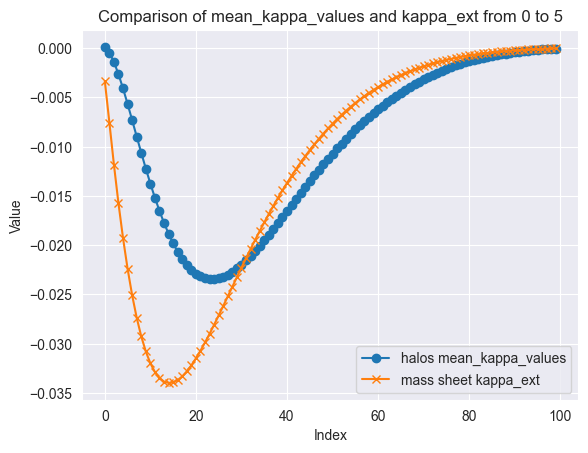

In [19]:
import matplotlib.pyplot as plt

mean_kappa_values=[0.0001339790283615006, -0.0004386236911728035, -0.001397247755644225, -0.002640956254821866, -0.00408477370251972, -0.0056577053687353225, -0.007300958585450093, -0.008966349481380516, -0.010614879620253615, -0.012215467994738965, -0.013743824764849496, -0.015181454026271518, -0.01651477375154699, -0.01773434186615543, -0.018834178203175327, -0.019811172825192125, -0.02066457191130921, -0.02139553308135539, -0.022006742669515425, -0.02250208806648421, -0.0228863788237091, -0.02316511075618169, -0.023344267792423178, -0.023430156802615697, -0.02342927108911516, -0.0233481786486934, -0.023193431713626336, -0.02297149445004632, -0.02268868603761958, -0.022351136675487708, -0.021964754356316625, -0.021535200524133394, -0.021067872983190725, -0.020567894655278654, -0.02004010699250148, -0.019489067042451978, -0.018919047333743923, -0.018334037902878096, -0.017737749919289357, -0.017133620484924277, -0.016524818288757258, -0.01591424988608569, -0.015304566448062128, -0.01469817088963423, -0.01409722533466786, -0.013503658916413273, -0.012919175940404003, -0.01234526445636238, -0.011783205296339104, -0.011234081639237302, -0.01069878915767316, -0.010178046792871674, -0.009672408187587488, -0.00918227378707178, -0.008707903594261733, -0.008249430538953627, -0.007806874392306616, -0.007380156128442193, -0.0069691126052845095, -0.0065735114075576515, -0.006193065667194984, -0.005827448651223831, -0.0054763078846208, -0.005139278557806902, -0.004815995954892648, -0.004506106631012662, -0.004209278066172294, -0.00392520652911451, -0.0036536228993232153, -0.003394296218596514, -0.003147034777375955, -0.002911684585324613, -0.0026881251308471174, -0.002476262403780259, -0.0022760192359979267, -0.0020873231108585397, -0.0019100917038468931, -0.0017442165422335218, -0.001589545316237638, -0.001445863533950563, -0.0013128763923884942, -0.0011901919354909349, -0.0010773067875700856, -0.0009735959920416856, -0.0008783087451772129, -0.0007905720982020678, -0.0007094050111558711, -0.0006337454701306963, -0.0005624937391016313, -0.0004945751994168343, -0.00042902663971319116, -0.0003651102974285489, -0.0003024604173927567, -0.00024126759156758298, -0.0001825066651602522, -0.0001282145559483236, -8.182491904137196e-05, -4.8567211555626544e-05, -3.593836986767046e-05, -5.4255994362227555e-05]

kappa_ext = [-0.0033351001113875217, -0.007544218326757872, -0.011826137645526213, -0.015759593364736882, -0.019286474259205336, -0.022392276268996307, -0.025079533532642365, -0.02736086524662198, -0.029255634875711298, -0.030787733111056394, -0.03198390430013337, -0.03287243595752229, -0.033482133981022386, -0.033841536004121764, -0.03397832506569245, -0.03391891013242587, -0.03368814323771648, -0.03330914623448356, -0.032803223553232064, -0.0321898407880565, -0.031486652236879666, -0.030709563579478447, -0.029872818596310077, -0.02898910119327478, -0.028069645989416726, -0.027124352378870724, -0.02616189831674719, -0.025189851152055916, -0.024214773672124882, -0.02324232417327175, -0.022277349867172596, -0.021323973301078783, -0.020385671739006395, -0.01946534964197292, -0.018565404516022108, -0.017687786481513704, -0.016834051967397318, -0.016005411958974747, -0.015202775233956667, -0.014426787014918025, -0.0136778634507315, -0.012956222318249382, -0.012261910310637477, -0.011594827252339677, -0.010954747553697478, -0.010341339191444017, -0.009754180475725977, -0.009192774839810137, -0.008656563865798076, -0.00814493873847578, -0.0076572502998859485, -0.0071928178593840784, -0.006750936897695293, -0.006330885788782631, -0.005931931650070268, -0.005553335419609819, -0.00519435624805785, -0.004854255283718412, -0.0045322989203087, -0.004227761569425067, -0.00393992801283454, -0.0036680953836091537, -0.003411574819679175, -0.00316969282853635, -0.0029417923975104273, -0.0027272338802074346, -0.002525395686289888, -0.002335674798747973, -0.0021574871401163387, -0.0019902678066964496, -0.0018334711877145344, -0.0016865709844523682, -0.0015490601427046605, -0.001420450710419956, -0.001300273631050376, -0.0011880784819508464, -0.0010834331661144433, -0.0009859235645920102, -0.0008951531561087053, -0.0008107426096463806, -0.0007323293550972549, -0.0006595671365042901, -0.0005921255518765982, -0.0005296895830989505, -0.00047195911903562385, -0.0004186484745552445, -0.00036948590786979786, -0.00032421313828348715, -0.0002825848661813352, -0.0002443682968502312, -0.00020934266951322267, -0.00017729879276864058, -0.00014803858745659107, -0.000121374637824403, -9.712975172782068e-05, -7.513653048432077e-05, -5.523694888750253e-05, -3.728194579561871e-05, -2.113102562181599e-05, -6.651870977416992e-06]

plt.plot(mean_kappa_values, label="halos mean_kappa_values", marker='o')
plt.plot(kappa_ext, label="mass sheet kappa_ext", marker='x')

# Adding titles and labels
plt.title("Comparison of mean_kappa_values and kappa_ext from 0 to 5")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.grid(True)
plt.show()

In [1]:
from astropy.cosmology import default_cosmology
cosmology = default_cosmology.get()
halos_Z=[]
halos_mass = [17785946622.11756, 116948368263.46162, 296623221508.49835, 538187033060.15704, 824860431065.3375, 1141852069151.5374, 1476400344731.0928, 1817732118740.8357, 2156958718285.79, 2486928533679.7085, 2802053242700.2695, 3098121749950.0933, 3372112812301.2554, 3622014368637.8345, 3846655000741.1895, 4045550811165.588, 4218769326789.2393, 4366810789710.585, 4490506321880.091, 4590931878625.125, 4669336571696.192, 4727083785571.969, 4765603478652.304, 4786354114417.289, 4790792773125.4795, 4780352130261.88, 4756423134996.459, 4720342370687.955, 4673383221400.079, 4616750099471.082, 4551575107279.6045, 4478916610570.232, 4399759291284.712, 4315015325587.7305, 4225526398793.3403, 4132066324453.0005, 4035344081247.072, 3936007119774.0137, 3834644822991.51, 3731792029980.814, 3627932553808.212, 3523502641325.7817, 3418894336445.1123, 3314458719393.7466, 3210509003172.411, 3107323475230.555, 3005148277752.8164, 2904200024037.439, 2804668251584.4907, 2706717714855.444, 2610490522368.819, 2516108124012.722, 2423673155268.7344, 2333271145548.911, 2244972098119.447, 2158831949167.1729, 2074893913514.901, 1993189724334.8584, 1913740773980.4614, 1836559162774.2952, 1761648662274.0605, 1689005599201.4485, 1618619665871.44, 1550474662609.6965, 1484549177300.7205, 1420817206871.8274, 1359248725192.3345, 1299810201555.132, 1242465073610.86, 1187174178344.1023, 1133896144416.0298, 1082587748949.6458, 1033204241601.3107, 985699638545.4978, 940026988797.9348, 896138615114.8403, 853986331532.2073, 813521639448.0648, 774695904001.7957, 737460512367.0271, 701767015447.5382, 667567254348.5554, 634813472887.6647, 603458417309.9908, 573455424280.6353, 544758498142.769, 517322378352.01935, 491102597926.11914, 466055533682.8148, 442138448978.32404, 419309529602.6784, 397527913436.8141, 376753714428.85236, 356948041403.2985, 338073012176.70135, 320091763416.13696, 302968456642.8018, 286668280751.37964, 271157451386.8339, 256403207493.42047]
z=[0.025, 0.07500000000000001, 0.12500000000000003, 0.17500000000000002, 0.22500000000000003, 0.2750000000000001, 0.32500000000000007, 0.3750000000000001, 0.4250000000000001, 0.4750000000000001, 0.5250000000000001, 0.5750000000000002, 0.6250000000000001, 0.6750000000000002, 0.7250000000000002, 0.7750000000000001, 0.8250000000000002, 0.8750000000000002, 0.9250000000000002, 0.9750000000000002, 1.0250000000000001, 1.0750000000000002, 1.1250000000000002, 1.175, 1.225, 1.2750000000000001, 1.3250000000000002, 1.3750000000000002, 1.4250000000000003, 1.475, 1.5250000000000001, 1.5750000000000002, 1.6250000000000002, 1.6750000000000003, 1.7250000000000003, 1.7750000000000004, 1.8250000000000002, 1.8750000000000002, 1.9250000000000003, 1.9750000000000003, 2.0250000000000004, 2.075, 2.1250000000000004, 2.1750000000000003, 2.2250000000000005, 2.2750000000000004, 2.325, 2.3750000000000004, 2.4250000000000003, 2.4750000000000005, 2.5250000000000004, 2.5750000000000006, 2.6250000000000004, 2.6750000000000003, 2.7250000000000005, 2.7750000000000004, 2.8250000000000006, 2.8750000000000004, 2.9250000000000003, 2.9750000000000005, 3.0250000000000004, 3.0750000000000006, 3.1250000000000004, 3.1750000000000007, 3.2250000000000005, 3.2750000000000004, 3.3250000000000006, 3.3750000000000004, 3.4250000000000007, 3.4750000000000005, 3.525000000000001, 3.5750000000000006, 3.6250000000000004, 3.6750000000000007, 3.7250000000000005, 3.775000000000001, 3.8250000000000006, 3.8750000000000004, 3.9250000000000007, 3.9750000000000005, 4.025000000000001, 4.075000000000001, 4.125000000000001, 4.175000000000002, 4.225000000000001, 4.275000000000001, 4.325000000000001, 4.375000000000001, 4.425000000000002, 4.475000000000001, 4.525000000000001, 4.575000000000001, 4.625000000000001, 4.675000000000002, 4.725000000000001, 4.775000000000001, 4.825000000000001, 4.875000000000001, 4.925000000000002, 4.975000000000001]
halos = {
    'z': z,
    'mass': halos_mass
}
from astropy.table import Table

halos_table = Table(halos)
print(halos_table)

from sim_pipeline.Halos.halos_lens import HalosLens
haloslen = HalosLens(halos_list=halos_table,mass_correction_list=None,cosmo=cosmology,
            sky_area=0.0001,
            samples_number=2000,
                     mass_sheet=False,
                     z_source=5)
kappa_dict2=haloslen.compute_kappa_in_bins()

         z                 mass       
------------------- ------------------
              0.025  17785946622.11756
0.07500000000000001 116948368263.46162
0.12500000000000003 296623221508.49835
0.17500000000000002 538187033060.15704
0.22500000000000003  824860431065.3375
 0.2750000000000001 1141852069151.5374
0.32500000000000007 1476400344731.0928
 0.3750000000000001 1817732118740.8357
 0.4250000000000001   2156958718285.79
 0.4750000000000001 2486928533679.7085
                ...                ...
  4.475000000000001 442138448978.32404
  4.525000000000001  419309529602.6784
  4.575000000000001  397527913436.8141
  4.625000000000001 376753714428.85236
  4.675000000000002  356948041403.2985
  4.725000000000001 338073012176.70135
  4.775000000000001 320091763416.13696
  4.825000000000001  302968456642.8018
  4.875000000000001 286668280751.37964
  4.925000000000002  271157451386.8339
  4.975000000000001 256403207493.42047
Length = 100 rows


C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
print(kappa_dict2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



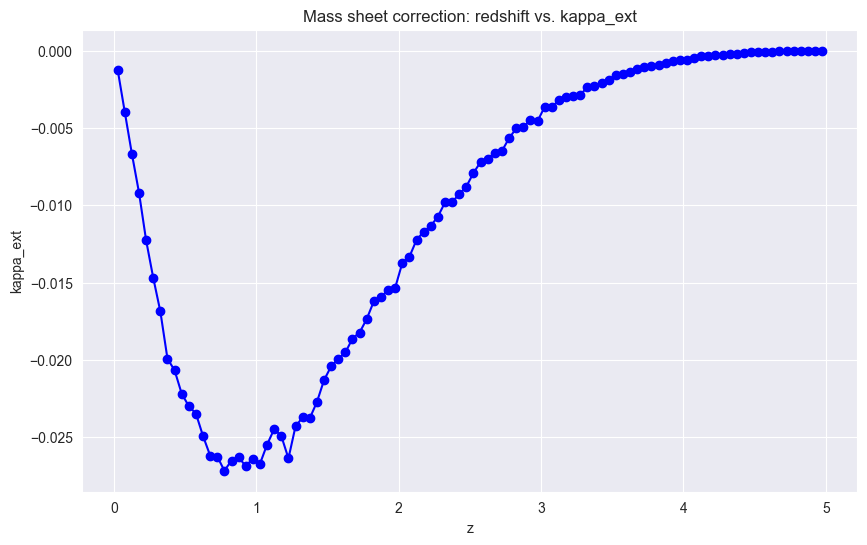

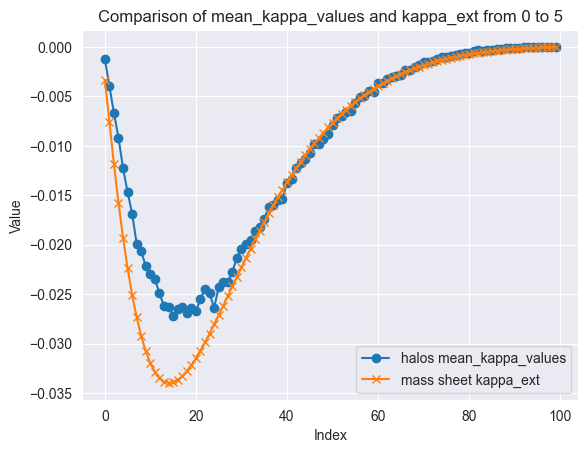

In [3]:
import matplotlib.pyplot as plt

mean_kappa_values=[-5.55681402673306e-05, -0.0006149336869070458, -0.0011329924887711253, -0.0025678609770943004, -0.004663361358058952, -0.0053947504736815656, -0.007408681889740341, -0.008323409790767535, -0.008761463959651957, -0.012295848256077673, -0.012814155217407319, -0.01269891236343562, -0.016742688140071762, -0.01793056473394751, -0.01818797082437311, -0.02012990312181634, -0.018363339531787464, -0.018527046249886034, -0.019963458399760867, -0.02013070580937273, -0.0205505479199214, -0.0224740508519639, -0.02097830686429974, -0.019050198333737733, -0.01955115366049259, -0.01882372785351634, -0.01960903986169944, -0.01841561847026073, -0.018365810863123007, -0.01759461013939513, -0.017516247431685443, -0.019388444260994637, -0.016484687066535476, -0.015927961819700586, -0.01640245813896915, -0.01621922519844766, -0.01382360774634344, -0.013292001333742655, -0.013100219191891846, -0.012082312470400095, -0.012837477159736804, -0.011523498253558447, -0.010278680489104984, -0.010022132461706048, -0.008851558596841256, -0.0091616853634952, -0.008770070664075404, -0.008032035821263956, -0.007610535241665484, -0.007282788495306416, -0.007163063756682649, -0.006522203682773773, -0.005651362015999407, -0.005175469538908095, -0.004921377731886408, -0.0044600826232503886, -0.004605098236909975, -0.004221554608580278, -0.003503865631662129, -0.003952682781485314, -0.003040719822262705, -0.00277145748324075, -0.0024901058403345127, -0.0026471375611689797, -0.002248347186569981, -0.0022539946913116967, -0.0019528260443138436, -0.001712802926866511, -0.00155603606356651, -0.0016437954333533126, -0.001397276739917583, -0.0011774173848501722, -0.0010520252304051518, -0.0010107960954325354, -0.0009088726141119315, -0.0007833894702042783, -0.0007419199448710107, -0.0006176853073954299, -0.0004810593145716517, -0.000501212246675231, -0.0003658138288472792, -0.0003964492070211614, -0.0003462589869553093, -0.0002571597027384782, -0.00022730671361697178, -0.00019790483904220976, -0.00013230026317702828, -0.00011453004647428925, -0.00010966447160836319, -8.615129429032874e-05, -7.396918598586845e-05, -5.4316402797163225e-05, -4.502463903551716e-05, -2.9223349885168796e-05, -1.5678558688495564e-05, -1.156644688725077e-05, -6.209015728738143e-06, -3.447841529134467e-06, -1.0922513771162278e-06, -1.7069874527136107e-07]


kappa_ext = [-0.0033351001113875217, -0.007544218326757872, -0.011826137645526213, -0.015759593364736882, -0.019286474259205336, -0.022392276268996307, -0.025079533532642365, -0.02736086524662198, -0.029255634875711298, -0.030787733111056394, -0.03198390430013337, -0.03287243595752229, -0.033482133981022386, -0.033841536004121764, -0.03397832506569245, -0.03391891013242587, -0.03368814323771648, -0.03330914623448356, -0.032803223553232064, -0.0321898407880565, -0.031486652236879666, -0.030709563579478447, -0.029872818596310077, -0.02898910119327478, -0.028069645989416726, -0.027124352378870724, -0.02616189831674719, -0.025189851152055916, -0.024214773672124882, -0.02324232417327175, -0.022277349867172596, -0.021323973301078783, -0.020385671739006395, -0.01946534964197292, -0.018565404516022108, -0.017687786481513704, -0.016834051967397318, -0.016005411958974747, -0.015202775233956667, -0.014426787014918025, -0.0136778634507315, -0.012956222318249382, -0.012261910310637477, -0.011594827252339677, -0.010954747553697478, -0.010341339191444017, -0.009754180475725977, -0.009192774839810137, -0.008656563865798076, -0.00814493873847578, -0.0076572502998859485, -0.0071928178593840784, -0.006750936897695293, -0.006330885788782631, -0.005931931650070268, -0.005553335419609819, -0.00519435624805785, -0.004854255283718412, -0.0045322989203087, -0.004227761569425067, -0.00393992801283454, -0.0036680953836091537, -0.003411574819679175, -0.00316969282853635, -0.0029417923975104273, -0.0027272338802074346, -0.002525395686289888, -0.002335674798747973, -0.0021574871401163387, -0.0019902678066964496, -0.0018334711877145344, -0.0016865709844523682, -0.0015490601427046605, -0.001420450710419956, -0.001300273631050376, -0.0011880784819508464, -0.0010834331661144433, -0.0009859235645920102, -0.0008951531561087053, -0.0008107426096463806, -0.0007323293550972549, -0.0006595671365042901, -0.0005921255518765982, -0.0005296895830989505, -0.00047195911903562385, -0.0004186484745552445, -0.00036948590786979786, -0.00032421313828348715, -0.0002825848661813352, -0.0002443682968502312, -0.00020934266951322267, -0.00017729879276864058, -0.00014803858745659107, -0.000121374637824403, -9.712975172782068e-05, -7.513653048432077e-05, -5.523694888750253e-05, -3.728194579561871e-05, -2.113102562181599e-05, -6.651870977416992e-06]

import matplotlib.pyplot as plt

avg_kappa_dict = {}
for single_dict in kappa_dict2:
    for z, kappa in single_dict.items():
        if z in avg_kappa_dict:
            avg_kappa_dict[z].append(kappa)
        else:
            avg_kappa_dict[z] = [kappa]

for z, kappas in avg_kappa_dict.items():
    avg_kappa_dict[z] = sum(kappas) / len(kappas)

# Extract z values and their corresponding mean kappa values
z_values = list(avg_kappa_dict.keys())
mean_kappa_values = [-avg_kappa_dict[z] for z in z_values]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(z_values, mean_kappa_values, c='blue')
plt.plot(z_values, mean_kappa_values, 'o-', color='blue', markersize=5)
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)
plt.show()

plt.plot(mean_kappa_values, label="halos mean_kappa_values", marker='o')
plt.plot(kappa_ext, label="mass sheet kappa_ext", marker='x')

# Adding titles and labels
plt.title("Comparison of mean_kappa_values and kappa_ext from 0 to 5")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()

plt.grid(True)
plt.show()

In [1]:
from halos_plus_glass import run_azimuthal_average_by_multiprocessing
from astropy.cosmology import default_cosmology
cosmo = default_cosmology.get()


azimuthal_dict_tot = run_azimuthal_average_by_multiprocessing(cosmo,
        m_min='1.0E+12',
        m_max='1.0E+16',
        z_max=5,
        mass_sheet_correction=False,
        n_iterations=2,
        sky_area=0.0001,
        samples_number=3)

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


The 2 halo-lists took 26.158191442489624 seconds to run


In [2]:
print(azimuthal_dict_tot)

[{0.0: 0.4406346284374641, 0.8463: 0.4451789336237799, 1.6926: 0.4596397758680101, 2.5389: 0.48655722353005415, 3.3851: 0.48670781457454965, 4.2314: 0.49960589868502936, 5.0777: 0.4701417702202005, 5.924: 0.4421393538234231, 6.7703: 0.42149946096053936, 7.6166: 0.4056743207699054, 8.4628: 0.40332019592254864, 9.3091: 0.40576411757531344, 10.1554: 0.40924074210801903, 11.0017: 0.39577207210095267, 11.848: 0.38738702633350774, 12.6943: 0.38181332501219245, 13.5405: 0.3857096784284919, 14.3868: 0.38499092828714326, 15.2331: 0.38704669347855436, 16.0794: 0.3884968392695032, 16.9257: 0.38454321040076733, 17.772: 0.3625870421603007, 18.6183: 0.3371789865536101, 19.4645: 0.3184078209532426, 20.3108: 0.3048244752668072}, {0.0: 0.4406346284374641, 0.8463: 0.4451789336237799, 1.6926: 0.4596397758680101, 2.5389: 0.48655722353005415, 3.3851: 0.48670781457454965, 4.2314: 0.49960589868502936, 5.0777: 0.4701417702202005, 5.924: 0.4421393538234231, 6.7703: 0.42149946096053936, 7.6166: 0.40567432076990

In [4]:
from halos_plus_glass import run_compute_azimuthal_kappa_in_bins_by_multiprocessing

from astropy.cosmology import default_cosmology
cosmo = default_cosmology.get()

results = run_compute_azimuthal_kappa_in_bins_by_multiprocessing(        n_iterations=100,
        sky_area=0.0001,
        samples_number=10,
        cosmo=cosmo,
        m_min='1.0E+12',
        m_max='1.0E+16',
        z_max=5,
        mass_sheet_correction=False)

The 100 halo-lists took 30512.091193675995 seconds to run


In [17]:
print(results)

{}


In [16]:
print(results)

{}


In [9]:
results_str = ""
for index, result_dict in enumerate(results):
    results_str += f"Result {index+1}:\n"
    results_str += '\n'.join([f'{key}: {value}' for key, value in result_dict.items()])
    results_str += '\n\n'  # Separate results with an empty line

# Save results to a .txt file
with open('results2.txt', 'w') as outfile:
    outfile.write(results_str)

In [25]:
import re
from collections import defaultdict

def aggregate_results(file_path):
    # Read the file content
    with open(file_path, 'r') as file:
        content = file.readlines()

    # Splitting content by "Result" to get individual results
    results = ''.join(content).split("Result")

    # Define keys for the internal dictionaries
    inner_keys = [0.0, 0.8463, 1.6926, 2.5389, 3.3851, 4.2314, 5.0777, 5.924, 6.7703, 7.6166, 8.4628, 9.3091, 10.1554, 11.0017, 11.848, 12.6943, 13.5405, 14.3868, 15.2331, 16.0794, 16.9257, 17.772, 18.6183, 19.4645, 20.3108]

    # Process each result to get averages
    all_averages = []
    for result in results[1:]:
        result_aggregated = defaultdict(lambda: defaultdict(float))
        result_counts = defaultdict(lambda: defaultdict(int))
        lines = result.strip().split("\n")[1:]
        for line in lines:
            key_match = re.match(r"(\d+\.\d+):", line)
            if key_match:
                key = float(key_match.group(1))

                # Check for data format
                if line.strip().endswith(': 0'):
                    for inner_key in inner_keys:
                        result_aggregated[key][inner_key] += 0
                        result_counts[key][inner_key] += 1
                else:
                    values = eval(line[key_match.end():].strip())
                    for v in values:
                        for inner_key, inner_value in v.items():
                            result_aggregated[key][inner_key] += inner_value
                            result_counts[key][inner_key] += 1

        # Average for this result
        for key, value in result_aggregated.items():
            for inner_key in value:
                value[inner_key] /= result_counts[key][inner_key]
        all_averages.append(result_aggregated)

    # Calculate the final average across all results
    final_aggregated = defaultdict(lambda: defaultdict(float))
    for avg in all_averages:
        for key, value in avg.items():
            for inner_key, inner_value in value.items():
                final_aggregated[key][inner_key] += inner_value

    # Dividing by the number of results to get the final average
    for key, value in final_aggregated.items():
        for inner_key in value:
            value[inner_key] /= len(all_averages)

    return final_aggregated

# Call the function
file_path = "results.txt"  # Replace with your file path
result = aggregate_results(file_path)
print(result)




defaultdict(<function aggregate_results.<locals>.<lambda> at 0x0000025910C1B9A0>, {0.025: defaultdict(<class 'float'>, {0.0: 0.0, 0.8463: 0.0, 1.6926: 0.0, 2.5389: 0.0, 3.3851: 0.0, 4.2314: 0.0, 5.0777: 0.0, 5.924: 0.0, 6.7703: 0.0, 7.6166: 0.0, 8.4628: 0.0, 9.3091: 0.0, 10.1554: 0.0, 11.0017: 0.0, 11.848: 0.0, 12.6943: 0.0, 13.5405: 0.0, 14.3868: 0.0, 15.2331: 0.0, 16.0794: 0.0, 16.9257: 0.0, 17.772: 0.0, 18.6183: 0.0, 19.4645: 0.0, 20.3108: 0.0}), 0.075: defaultdict(<class 'float'>, {0.0: 0.0006606526851895157, 0.8463: 0.0006616448721771849, 1.6926: 0.0006610927820849656, 2.5389: 0.0006480964211631116, 3.3851: 0.0006401127559730962, 4.2314: 0.0006317601038544063, 5.0777: 0.0006249283337323277, 5.924: 0.0006175304880794196, 6.7703: 0.0006072400107986868, 7.6166: 0.0005963505012410467, 8.4628: 0.0005876948116056296, 9.3091: 0.0005795885374230156, 10.1554: 0.000570293363399857, 11.0017: 0.0005597158648583129, 11.848: 0.0005486804417039999, 12.6943: 0.0005383347527594402, 13.5405: 0.0005

In [48]:
def save_to_txt(data, filename):
    with open(filename, 'w') as file:
        for outer_key, inner_dict in data.items():
            file.write(f"{outer_key}:\n")
            for inner_key, value in inner_dict.items():
                file.write(f"\t{inner_key}: {value}\n")
            file.write("\n")

save_to_txt(result, 'average_results.txt')

C:\Users\TXZ27\AppData\Local\Temp\ipykernel_4304\1273244991.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


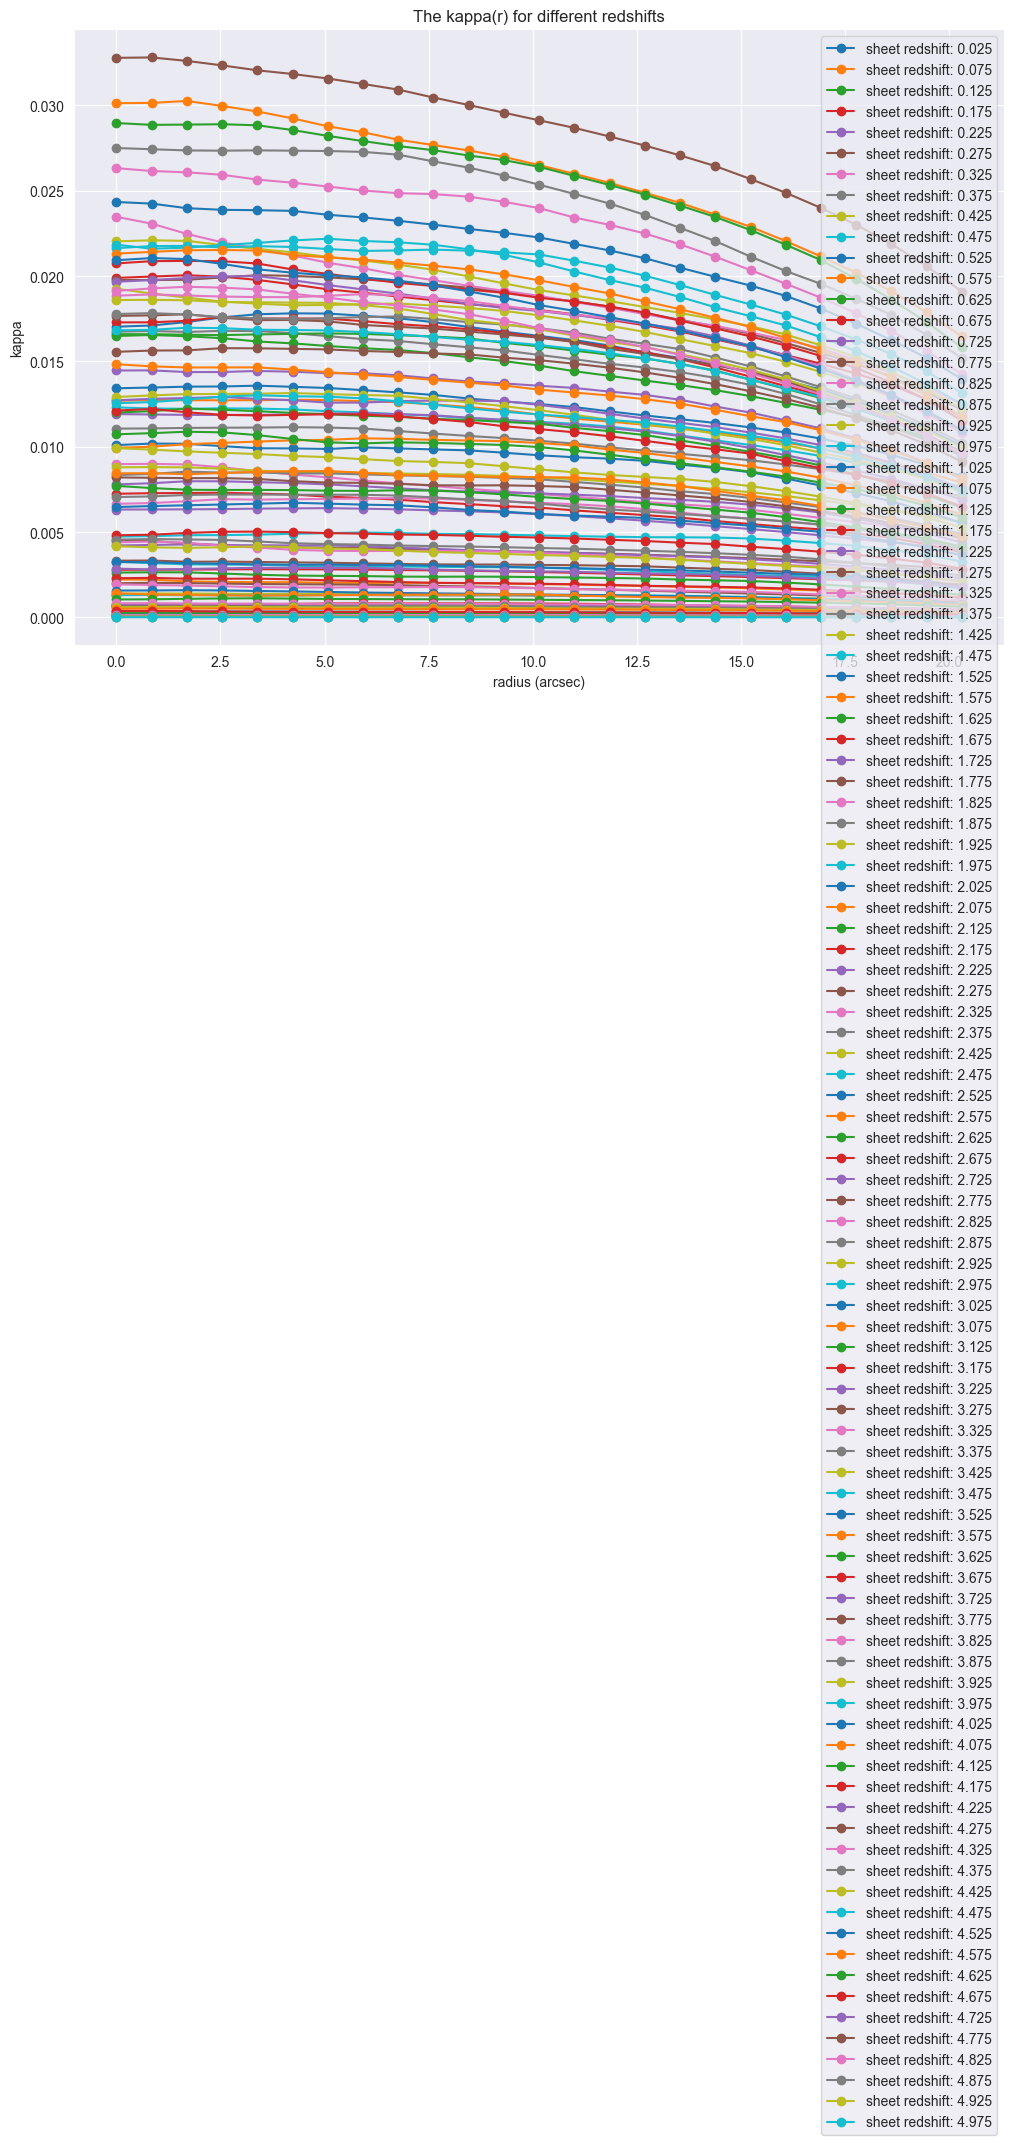

In [47]:
import matplotlib.pyplot as plt

def visualize_partial_data(result, num_keys=20):
    # Selecting a subset of the data
    subset = dict(list(result.items())[:num_keys])
    fig, ax = plt.subplots(figsize=(12, 8))

    for key, value in subset.items():
        x = list(value.keys())
        y = list(value.values())
        ax.plot(x, y, marker='o', label=f"sheet redshift: {key}")

    ax.set_title("The kappa(r) for different redshifts")
    ax.set_xlabel("radius (arcsec)")
    ax.set_ylabel("kappa")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Call the visualization function for a subset
visualize_partial_data(result, 500)

